In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ISLP.models import ModelSpec as MS
from l0bnb import fit_path
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots

In [2]:
np.random.seed(1)
rng = np.random
n = 1000
p = 20
X = pd.DataFrame(rng.normal(size=(n,p), scale=0.5))
eps = rng.normal(size=n, scale=4)
B = rng.normal(size=p)
for i in range(0, np.random.randint(0,p)):
    B[np.random.randint(0,p)] = 0
B

array([ 0.53664242,  0.15319799, -2.57827   ,  0.        , -0.20799475,
        1.05951536,  0.90798515, -0.49093573,  2.2325149 ,  1.35304744,
        0.3441279 ,  0.09755438,  0.        , -0.45191349,  0.90598611,
        0.22037153,  2.05503319,  0.85134642,  0.        ,  0.        ])

In [3]:
Y = np.dot(X,B) + eps

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.9,random_state=0)

In [5]:
# Best subset selection using l0bnb

# Producing a path of solutions using subset size as a penalty rather than constraint
design = MS(X_train.columns).fit(X_train)
D = design.fit_transform(X_train)
# Remove intercept since l0bnb fits that seperately
D = D.drop('intercept', axis=1)
X_train = np.asarray(D)

In [6]:
path = fit_path(X_train, Y_train,
                max_nonzeros=X_train.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  1
Iteration: 3. Number of non-zeros:  1
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  2
Iteration: 6. Number of non-zeros:  2
Iteration: 7. Number of non-zeros:  2
Iteration: 8. Number of non-zeros:  2
Iteration: 9. Number of non-zeros:  5
Iteration: 10. Number of non-zeros:  5
Iteration: 11. Number of non-zeros:  5
Iteration: 12. Number of non-zeros:  5
Iteration: 13. Number of non-zeros:  5
Iteration: 14. Number of non-zeros:  5
Iteration: 15. Number of non-zeros:  8
Iteration: 16. Number of non-zeros:  8
Iteration: 17. Number of non-zeros:  8
Iteration: 18. Number of non-zeros:  8
Iteration: 19. Number of non-zeros:  8
Iteration: 20. Number of non-zeros:  8
Iteration: 21. Number of non-zeros:  8
Iteration: 22. Number of non-zeros:  8
Iteration: 23. Number of non-zeros:  8
Iteration: 24. Number of non-zeros:  8
Iteration: 25. Number of non-zeros:  8
I

In [7]:
# Write a function that will predict Y given X at a given iteration in the path
def predict_path(idx, X, Y):
    y_hat = np.matmul(X, path[idx]['B'])
    error = ((y_hat - Y)**2).mean()
    return error

In [8]:
MSE = []
for i in range(0, len(path)):
    MSE.append(predict_path(i, X_train, Y_train))

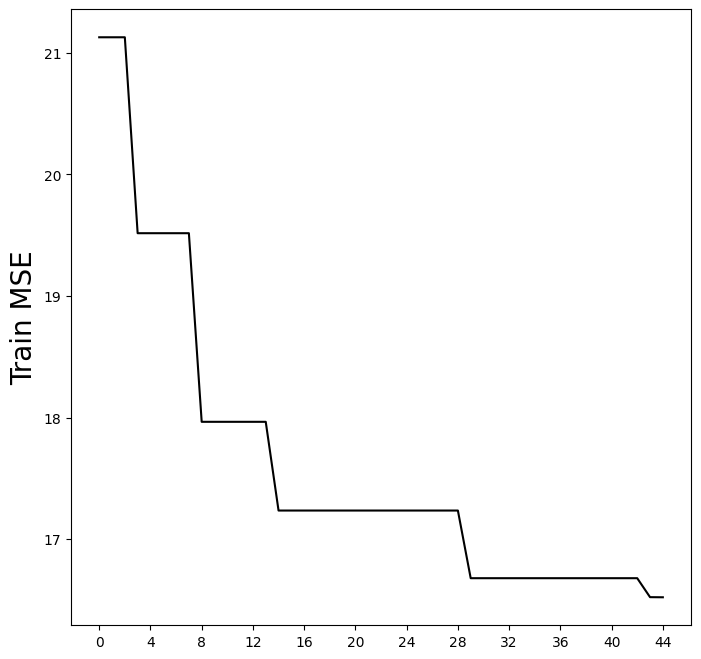

In [9]:
mse_fig, ax = subplots(figsize=(8,8))

ax.plot(np.arange(len(path)),
        MSE,
        'k'); # color = black
ax.set_ylabel('Train MSE', fontsize=20)
ax.set_xticks(np.arange(len(path))[::4]);

In [10]:
MSE_test = []
for i in range(0,len(path)):
    MSE_test.append(predict_path(i, X_test, Y_test))

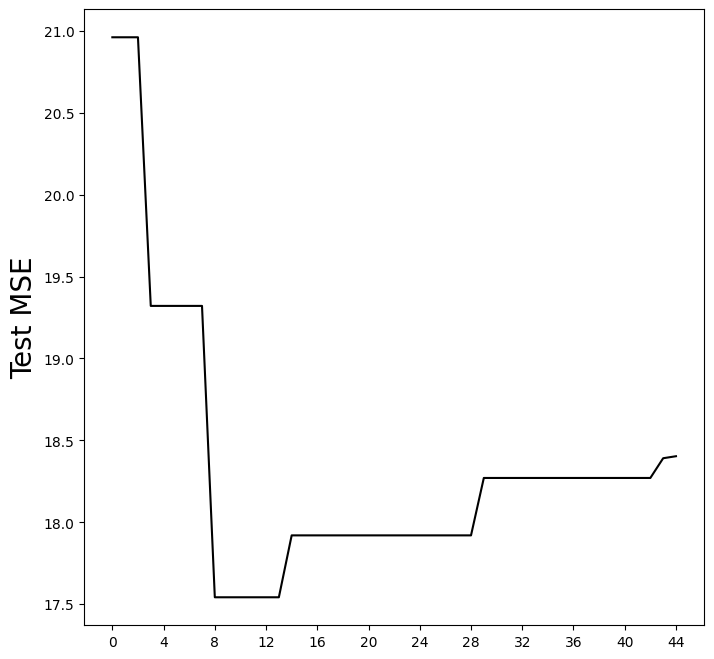

In [11]:
mse_fig, ax = subplots(figsize=(8,8))

ax.plot(np.arange(len(path)),
        MSE_test,
        'k'); # color = black
ax.set_ylabel('Test MSE', fontsize=20)
ax.set_xticks(np.arange(len(path))[::4]);